# Data import for SK experiments
Experiment runs - these are runs on the **first rig**, ran and segmented by Steffen: 

|date	| animal| session_subname |
|-------|-------|-----------------|
|180113	| JC049	| run01_darkblock |
|-| - | run02_light     |
|-| - | run03_dark      |
|180114	| JC049	| run01_darkblock |
|-| JC049	| run02_light     |
|-|JC049	| run03_dark      |
|180117 | JC060 | run01_dark |
| - |-| run02_light |
|180122	| JC049 | run01_dark |
| -	| -	| run02_light|
|180123 |	JC049	| run01_dark|
| - |	- | run02_light|

JC049 - female Rorb-Cre mouse with AAV-hSyn-Gcamp6 dob:2017-06-17

JC060 - female Rorb-Cre mouse with AAV-hSyn-Gcamp6 dob: 2017-09-27

In [ ]:
###########################################################
# Add Session data for experiment runs for SK experiments #
###########################################################
from djexpcode import *
import numpy as np

animalNames = ['JC049','JC049','JC060','JC049','JC049',
               'JC069']
experimentNames = ['180113_JC049_2P_SK','180114_JC049_2P_SK','180117_JC060_2P_SK','180122_JC049_2P_SK','180123_JC049_2P_SK']
runNumbers = [[0,1],[0,1,2],[0,1],[0,1],[0,1],[0]]
#'180123_JC060_2P_SK'
for animalName,experimentName,runNumber in zip(animalNames,experimentNames,runNumbers):
    sessions,sessionRun = listSessions(experimentName) 
    idx = int(np.where(sessions['session_name'].astype(str) == experimentName)[0])
    session = sessions[idx]
    sessionRuns = sessionRun[idx][runNumber]

    try:
        addSessionRuns(session,sessionRuns)
    except AssertionError:
        nbAddMouse(animalName)
    expkey = dict(session_name = experimentName)
    #print(SessionRun() & 'mouse_id = "{0}"'.format(animalName) & 'session_name = "{0}"'.format(experimentName))

In [ ]:
# Gathers segmentation and behavior data...
from djexpcode import *

# Behavior().populate(display_progress = True)
# TwoPhotonVolume().populate(display_progress = True)
# Segmentation().populate(display_progress = True)
# StimulusAirPuff().populate(display_progress=True)
# VisualStimuli().populate(display_progress=True)


### Define belt and metadata for these experiments

Treadmill gathered from 180123_JC060_2P_SK; a run that had cam and was done with the same belt on the same rig.
Gets whether there is an eye block and the light condition from the session subname.

In [2]:
# Belt cue locations
belt = dict(belt_id = 't03g0',
            belt_length = 150.,
            belt_cues = np.array([[27,35], [68,77],[110,117]]))
TreadmillBelt().insert([belt],skip_duplicates = True)


experimentNames = ['180113_JC049_2P_SK',
                   '180114_JC049_2P_SK',
                   '180117_JC060_2P_SK',
                   '180122_JC049_2P_SK',
                   '180123_JC049_2P_SK',]
beltid = belt['belt_id']
keys = []
# Assuming all experiments are the same (led off)
for e in experimentNames:
    tt = (Segmentation() & 'session_name = "{0}"'.format(e)).fetch()
    for name,subname in tt[['session_name','session_subname']]:
        session = (SessionRun() &
                   'session_name = "{0}"'.format(name) &
                   'session_subname = "{0}"'.format(subname)).fetch()[0]
        seldict = structuredArrayToDict(session)
        block = 0
        if 'block' in subname:
            block = 1
        lightcond = 'dark'
        if 'light' in subname:
            lightcond = 'light'
        keys.append(dict(seldict,
                         belt_id = beltid,
                         belt_length = 150., 
                         enucleated = 0,
                         headpost_angle=0,
                         shield_distance = 2.5,
                         led_eye='off',
                         light_conditions=lightcond,
                         whiskers = 'intact',
                         whisker_block = 0,
                         eye_blocker = block,
                         notes = ''))

TreadmillPositionExperiment().insert(keys,ignore_extra_fields=True,
                                     skip_duplicates=True)
# Print the treadmill experiment
tt = []
for k in keys:
    tt +=((TreadmillPositionExperiment() & k).fetch(as_dict=True))
import pandas as pd
pd.DataFrame.from_records(tt,columns=tt[0].keys())

mouse_id session_date        session_name  run_num  session_subname  \
0     JC049   2018-01-13  180113_JC049_2P_SK        0  run01_darkblock   
1     JC049   2018-01-13  180113_JC049_2P_SK        1      run02_light   
2     JC049   2018-01-14  180114_JC049_2P_SK        0  run01_darkblock   
3     JC049   2018-01-14  180114_JC049_2P_SK        1      run02_light   
4     JC049   2018-01-14  180114_JC049_2P_SK        2       run03_dark   
5     JC060   2018-01-17  180117_JC060_2P_SK        0       run01_dark   
6     JC060   2018-01-17  180117_JC060_2P_SK        1      run02_light   
7     JC049   2018-01-22  180122_JC049_2P_SK        0       run01_dark   
8     JC049   2018-01-22  180122_JC049_2P_SK        1      run02_light   
9     JC049   2018-01-23  180123_JC049_2P_SK        0       run01_dark   
10    JC049   2018-01-23  180123_JC049_2P_SK        1      run02_light   

   belt_id  enucleated  headpost_angle  shield_distance led_eye  \
0    t03g0           0             0.0              2.5     off   
1    t03g0           0             0.0              2.5     off   
2    t03g0           0             0.0              2.5     off   
3    t03g0           0             0.0              2.5     off   
4    t03g0           0             0.0              2.5     off   
5    t03g0           0             0.0              2.5     off   
6    t03g0           0             0.0              2.5     off   
7    t03g0           0             0.0              2.5     off   
8    t03g0           0             0.0              2.5     off   
9    t03g0           0             0.0              2.5     off   
10   t03g0           0             0.0              2.5     off   

   light_conditions whiskers  whisker_block  eye_blocker notes  
0              dark   intact              0            1        
1             light   intact              0            0        
2              dark   intact              0            1        
3             light   intact              0            0        
4              dark   intact              0            0        
5              dark   intact              0            0        
6             light   intact              0            0        
7              dark   intact              0            0        
8             light   intact              0            0        
9              dark   intact              0            0        
10            light   intact              0            0

In [ ]:
# Compute position maps and stats
PositionMaps().populate(display_progress=True)
PositionMapsStats().populate(display_progress=True)

## Overview of data for all sessions

- df/f maps (sorted)
- cue peak response versus explained variance for light versus dark runs 
- example cell that responds in light but not dark


<IPython.core.display.Javascript object>


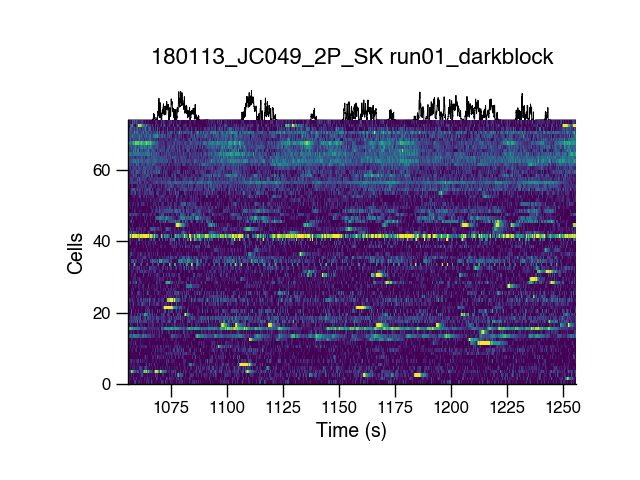

/opt/conda/envs/tacnav/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


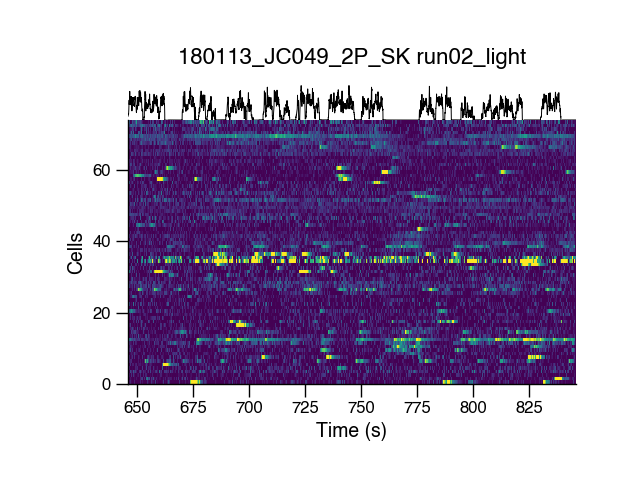

/opt/conda/envs/tacnav/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


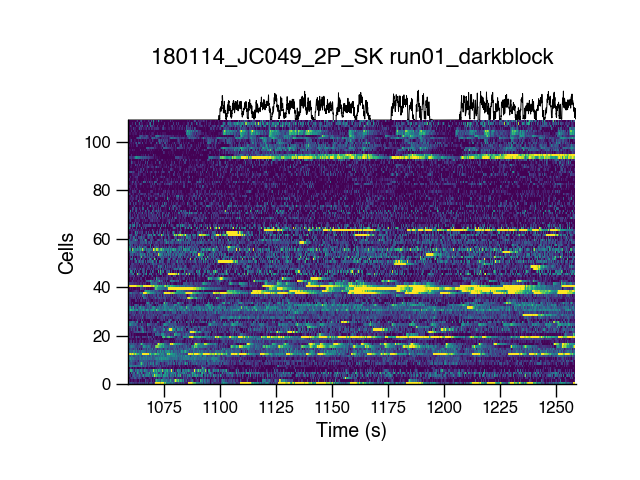

/opt/conda/envs/tacnav/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


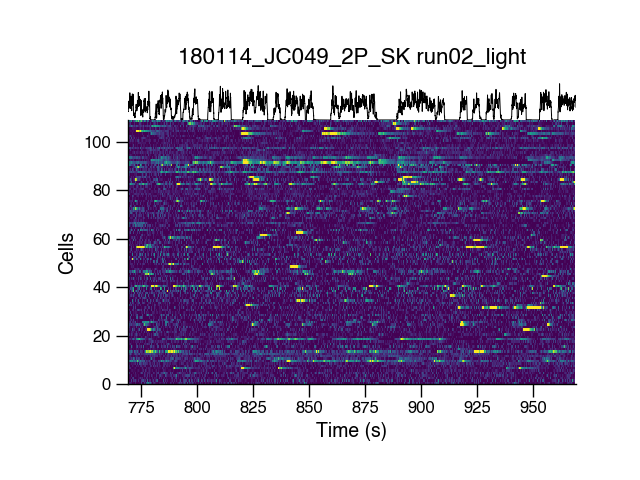

/opt/conda/envs/tacnav/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


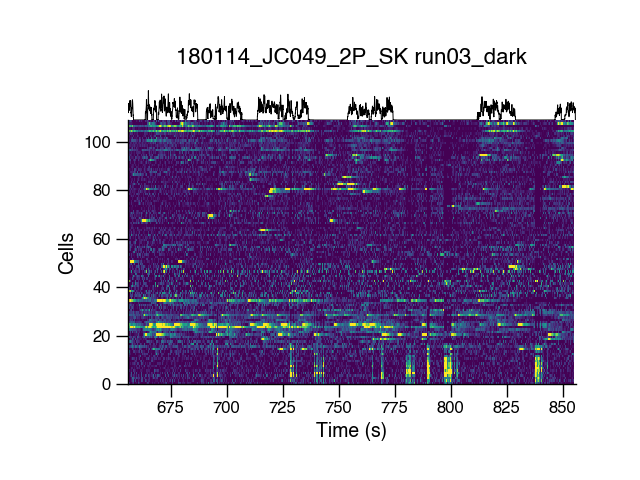

/opt/conda/envs/tacnav/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


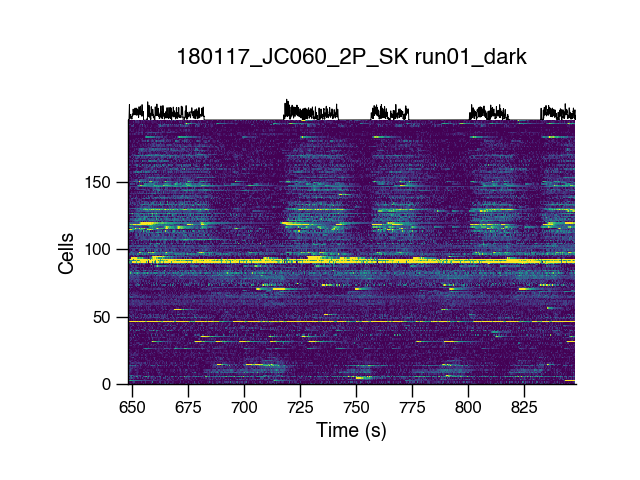

/opt/conda/envs/tacnav/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


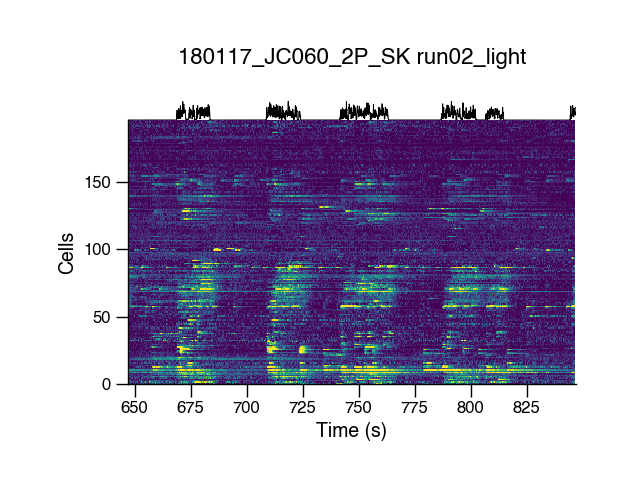

/opt/conda/envs/tacnav/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


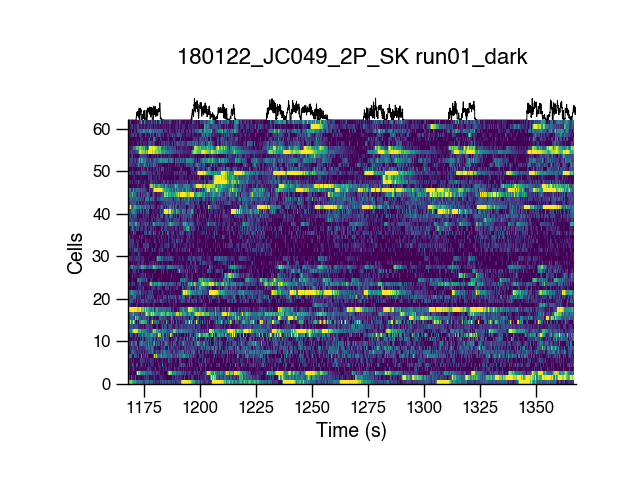

/opt/conda/envs/tacnav/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


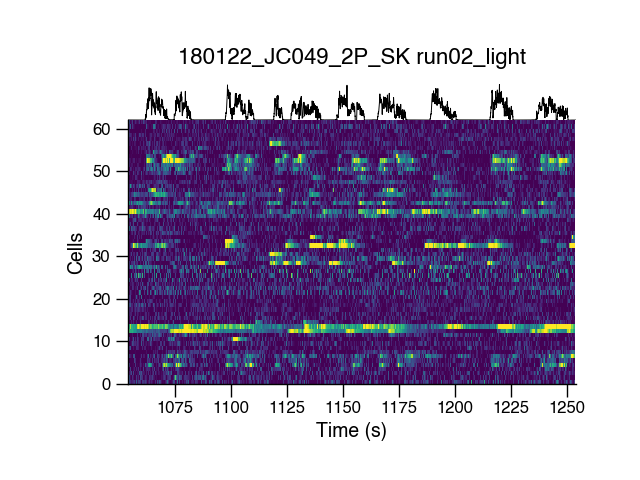

/opt/conda/envs/tacnav/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


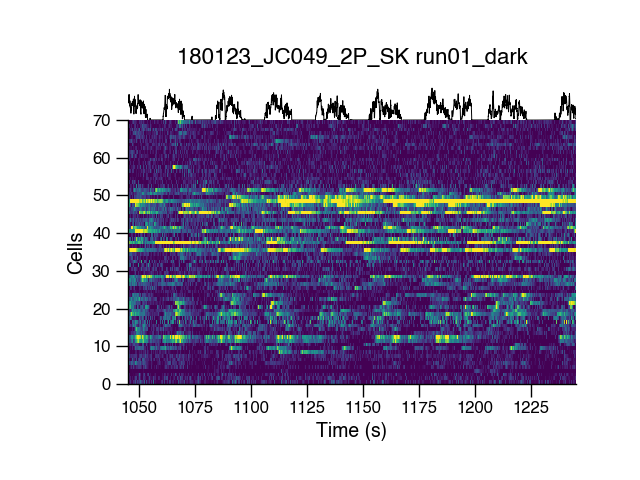

/opt/conda/envs/tacnav/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


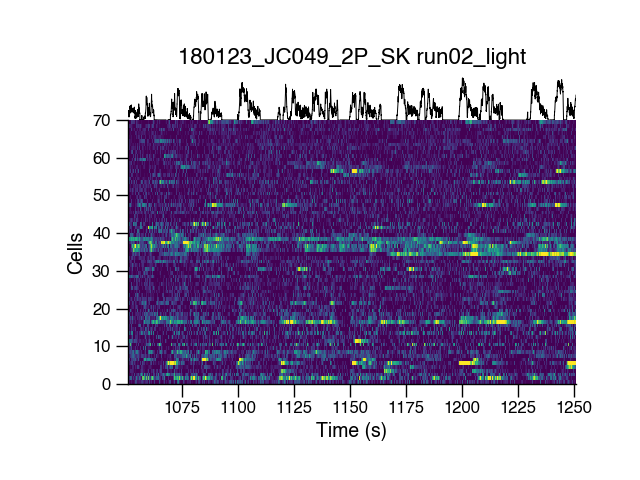

/opt/conda/envs/tacnav/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [148]:
from djexpcode import *
experimentNames = ['180113_JC049_2P_SK',
                   '180114_JC049_2P_SK',
                   '180117_JC060_2P_SK',
                   '180122_JC049_2P_SK',
                   '180123_JC049_2P_SK',]
keys = []

for e in experimentNames:
    tt = (Segmentation() & 'session_name = "{0}"'.format(e)).fetch()
    for name,subname in tt[['session_name','session_subname']]:
        session = (SessionRun() &
                   'session_name = "{0}"'.format(name) &
                   'session_subname = "{0}"'.format(subname)).fetch()[0]
        keys.append(structuredArrayToDict(session))

# Sorted df/f maps for all experiments/runs
%matplotlib notebook
for k in keys:
    
    frametimes,btime,bpos,bvel = (TwoPhotonPlane()*Behavior()& k).fetch('frametimes',
                                                                        'behaviortime',
                                                                        'behaviorposition',
                                                                        'behaviorvelocity')
    df_f,deconv = (Segmentation.Traces() & k).fetch('df_f','deconv')
    Sm,isort = sort_rastermap(np.stack(df_f,axis=0),smooth_time = True,zscore_norm = False)
    fig = plt.figure()
    ax = fig.add_axes([0.2,0.2,0.7,0.55])
    plt.imshow(Sm,#np.stack(deconv[isort],axis = 0),
               extent=[frametimes[0][0],frametimes[0][-1],0,len(df_f)],aspect='auto',clim=[0,200])
    plt.xlim(np.array([-200,0])+np.ceil(frametimes[0][-1]))
    plt.xlabel('Time (s)')
    plt.ylabel('Cells')
    ax = fig.add_axes([0.2,0.75,0.7,0.1])
    plt.plot(btime[0],lowpass(bvel[0]*150),lw = 0.7)
    plt.xlim(np.array([-200,0])+np.ceil(frametimes[0][-1]))
    plt.ylim([0,50])
    plt.axis('off')
    plt.title('{session_name} {session_subname}'.format(**k))
    

In [4]:
# Read data and separate conditions
from djexpcode import *
from djexpcode.plotutils import *
dat = []
for k in keys:
    dat += (PositionMapsStats.ActivityMapStats()*TreadmillPositionExperiment() & k).fetch(as_dict=True)

import pandas as pd
dat = pd.DataFrame.from_records(dat,columns=dat[0].keys())

datlight = dat[dat['light_conditions'] == 'light']
datdark = dat[dat['light_conditions'] == 'dark']


<IPython.core.display.Javascript object>


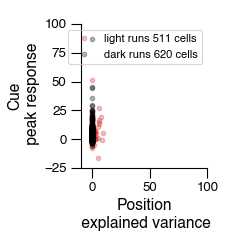

In [178]:
# Position explained variance for the 2 conditions
%matplotlib notebook
fig = plt.figure(figsize = [3,3])
fig.add_axes([0.3,0.3,0.6,0.6])
markerpar = dict(linestyle = '',alpha=0.3,marker = 'o',clip_on='off')

plt.plot(np.stack(datlight['position_ev'],axis = 0),np.stack(datlight['cue_amplitude'],axis = 0),**markerpar,
        color = colors[1],label='light runs {0} cells'.format(len(datlight)))
plt.plot(np.stack(datdark['position_ev'],axis = 0),
         np.stack(datdark['cue_amplitude'],axis = 0),**markerpar,
         color = colors[0],label='dark runs {0} cells'.format(len(datdark)))
plt.xlabel('Position\n explained variance')
plt.ylabel('Cue\n peak response')
plt.axis('square');
plt.axis([-10,100,-25,100])
plt.legend(loc=0);

<IPython.core.display.Javascript object>


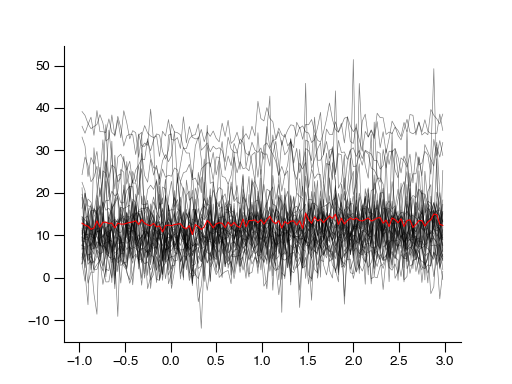

In [180]:
idx = np.argmax(np.stack(datdark['cue_amplitudes'],axis=0).max(axis = 0))

tk = dict(session_name = datdark.iloc[idx]['session_name'],
          session_subname = datdark.iloc[idx]['session_subname'])

cue_map_time = (PositionMaps() & tk).fetch('cue_map_space')[0]

icue = 2

tt = datdark
%matplotlib notebook
plt.plot(cue_map_time,np.stack(tt['mean_cue_df_f'],axis = 0)[isort,icue,:].T, #- 
         #np.mean(np.stack(tt[tt['position_ev']>-1]['mean_cue_df_f'],axis = 0)[isort,icue,0:20].T,axis=0),
         linewidth = 0.6,
         color = 'k',
         alpha = 0.5)
plt.plot(cue_map_time,np.stack(tt['mean_cue_df_f'],axis = 0)[isort,icue,:].mean(axis = 0).T, #- 
         #np.mean(np.stack(tt[tt['position_ev']>-1]['mean_cue_df_f'],axis = 0)[isort,icue,0:20].T,axis=0),
         linewidth = 1,
         color = 'r',
         alpha = 1)



### Example of df/f of a cell matched between light and dark runs. 

On dark runs (black) cell does not have activity. 

Each trace is the response to a cue.

Note that this particular cell is at the **edge of the plane**.

<IPython.core.display.Javascript object>


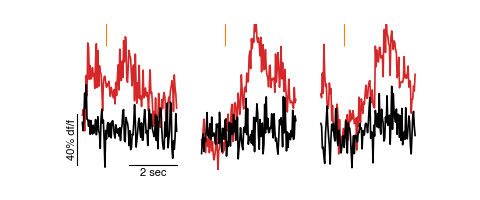

In [183]:
idx = np.argmax(np.stack(datlight['cue_amplitudes'],axis=0).max(axis = 1))
tmp = datdark[(datdark['roi'] == datlight.iloc[idx]['roi']) & 
              (datdark['session_name'] ==datlight.iloc[idx]['session_name'])].iloc[0]
%matplotlib notebook
fig = plt.figure(figsize = [6,2.5])
for ii,(a,b) in enumerate(zip(datlight['mean_cue_df_f'].iloc[idx],datdark['mean_cue_df_f'].iloc[idx])):
    plt.plot(cue_map_time+ii*5,a,color=colors[1],alpha = 1)
    plt.plot(cue_map_time+ii*5,b,color=colors[0],alpha = 1)
    
plt.plot(np.arange(3)*5,[100]*3,'|',color=colors[3],alpha = 1,markersize=40)    
plt.ylim([-20,100])
plt.plot([1,3],[-10,-10],color = 'k',lw = 1)
plt.text(2,-12,'2 sec',va = 'top',ha='center')
plt.plot([-1.2,-1.2],[-10,30],clip_on=False,color = 'k',lw=1)
plt.text(-1.2,10,'40% df/f',va = 'center',ha='right',rotation=90)
plt.axis('off');

# This is to plot cell locations.
# nlines,ncols = (TwoPhotonVolume() & tk).fetch('nlines','ncols')
# ppath = pjoin(preferences['datapaths']['twophotonpaths']['reg'],datdark.iloc[idx]['session_name'],
#               datlight.iloc[idx]['session_subname'])
# regfiles = searchDataServers(ppath,'tif')
# stack = []
# from tqdm import tqdm
# for f in tqdm(regfiles[::5]):
#     stack.append(imread(f))
# stack = np.concatenate(stack,axis = 0)
# dims = stack.shape[1:]

# Cn = stack.std(axis = 0)

# tk = dict(session_name = datlight.iloc[idx]['session_name'],
#          roi = datlight.iloc[idx]['roi'])

# rpix = (Segmentation.ROI() & tk).fetch('roi_pixels')

# ii = getROIcontour(rpix[1],[dims[1],dims[0]])
# %matplotlib notebook

# plt.imshow(Cn.squeeze()[300:400,0:50])
# plt.plot(ii[0][:,1],ii[0][:,0])

/opt/conda/envs/tacnav/lib/python3.6/site-packages/scipy/stats/stats.py:2251: RuntimeWarning: invalid value encountered in true_divide
  np.expand_dims(sstd, axis=axis))


<IPython.core.display.Javascript object>


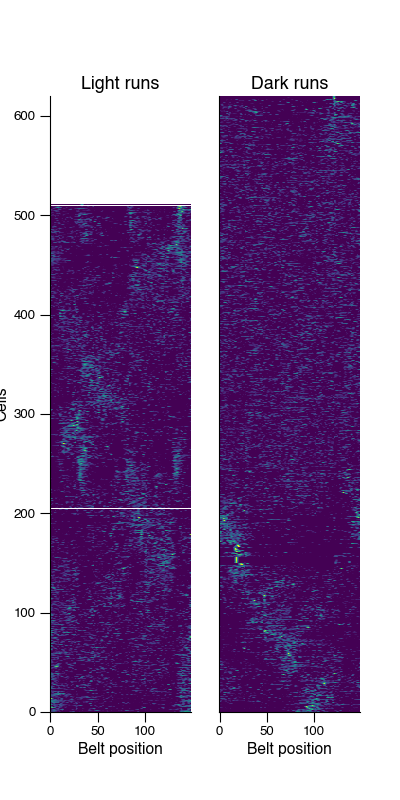

In [211]:
# All cells raster sorted 
%matplotlib notebook
Sm,isort = sort_rastermap(np.stack(datlight['mean_position_deconv'],axis = 0),smooth_space = False,
                          smooth_time = True,zscore_norm= True)
fig = plt.figure(figsize = [5,10])
fig.add_subplot(1,2,1)

plt.imshow(Sm,
           clim=[0,5],cmap='viridis',aspect = 'auto')
plt.title('Light runs')
plt.ylabel('Cells')
plt.xlabel('Belt position')
plt.ylim(0,max([len(datdark),len(datlight)]))
fig.add_subplot(1,2,2)
Sm,isort = sort_rastermap(np.stack(datdark['mean_position_deconv'],axis = 0),smooth_space = False,
                          smooth_time = True,zscore_norm= True)
plt.imshow(Sm,
           clim=[0,5],cmap='viridis',aspect = 'auto')
plt.title('Dark runs')
plt.xlabel('Belt position')
plt.yticks([])
plt.ylim(0,max([len(datdark),len(datlight)]));